<a href="https://colab.research.google.com/github/OhaN2k/diveintocode-ml/blob/master/assignment_2_for_machine_learning_a_question_of_going_down_Mt_Fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving mtfuji_data.csv to mtfuji_data.csv


In [4]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


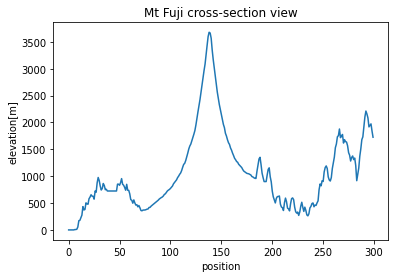

In [23]:
# [Problem 1] Visualization of data
import matplotlib.pyplot as plt
plt.title("Mt Fuji cross-section view")
plt.ylabel("elevation[m]")
plt.xlabel("position")
plt.plot(np.arange(fuji.shape[0]), fuji.T[3])

In [6]:
# [Problem 2] Create a function to calculate the slope of a point
def compute_gradient(x, data):
  return np.array(data[x]-data[x-1])
print(compute_gradient(135, fuji.T[3]))

178.42999999999984


In [104]:
# [Problem 3] Create a function to calculate the destination
A = 0.2
def calc_dest(cur_location, data):
  try:
    dest = round(cur_location-A*compute_gradient(cur_location, data))
    assert dest >= 0 and dest < len(data)
    return dest
  except AssertionError :
    return -1

In [105]:
# [Problem 4] Creating a function to go down the mountain
def go_down(data, x=136):
  l = [x]
  while l.count(l[-1]) < 2:
    new_dest = calc_dest(l[-1], data)
    if new_dest == -1: break
    l.append(new_dest)
  return np.array(l)
path = go_down(fuji.T[3])
print("Path:\n{}".format(path))
elevation = np.array(list(map(lambda x: fuji.T[3][x], path)))
print("Elevation:\n{}".format(elevation))

Path:
[136 102  98  95  93  89  85  82  79  73  70  78  77  75  75]
Elevation:
[3434.59  817.62  741.17  672.36  631.71  575.07  505.1   458.66  418.41
  368.91  412.27  390.14  386.64  371.19  371.19]


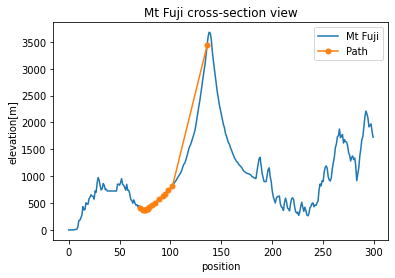

In [106]:
# [Problem 5] Visualization of the descent process
plt.title("Mt Fuji cross-section view")
plt.ylabel("elevation[m]")
plt.xlabel("position")
plt.plot(np.arange(fuji.shape[0]), fuji.T[3], label="Mt Fuji")
plt.plot(path, elevation, marker='.', ms=10, label="Path")
plt.legend()


Path:
[142 177 178 180 186 164 169 173 176 177]
Elevation:
[3171.53 1043.91 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33
 1043.91]


'\nWhen I choose initial location at 142, there will be a loop where the path goes \ndown but then up due to the gradient at that point, then it will go back down \nagain then up around valley point.\n'

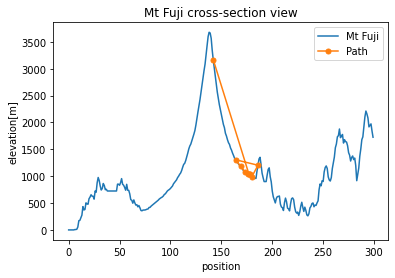

In [107]:
# [Problem 6] Change of initial value
all_path = []
for i in range(fuji.shape[0]):
  all_path.append(go_down(fuji.T[3],i))

print("Path:\n{}".format(all_path[142]))
ele = np.array(list(map(lambda x: fuji.T[3][x], all_path[142])))
print("Elevation:\n{}".format(ele))
plt.title("Mt Fuji cross-section view")
plt.ylabel("elevation[m]")
plt.xlabel("position")
plt.plot(np.arange(fuji.shape[0]), fuji.T[3], label="Mt Fuji")
plt.plot(all_path[142], ele, marker='.', ms=10, label="Path")
plt.legend()

"""
When I choose initial location at 142, there will be a loop where the path goes 
down but then up due to the gradient at that point, then it will go back down 
again then up around valley point.
"""

Path:
[136   1   1]
Elevation:
[3434.59    0.      0.  ]


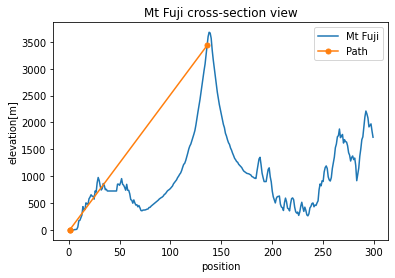

In [108]:
# [Problem 7] (Advance problem) Change hyperparameters
A = 0.8
path = go_down(fuji.T[3])
print("Path:\n{}".format(path))
elevation = np.array(list(map(lambda x: fuji.T[3][x], path)))
print("Elevation:\n{}".format(elevation))
plt.title("Mt Fuji cross-section view")
plt.ylabel("elevation[m]")
plt.xlabel("position")
plt.plot(np.arange(fuji.shape[0]), fuji.T[3], label="Mt Fuji")
plt.plot(path, elevation, marker='.', ms=10, label="Path")
plt.legend()
"""
When I change the learning rate to 0.8 with the inital value of 136 in problem 5,
the path will jump straight to the first point of the mountain because the 
hyperparameter is too high.
"""